In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


import acquire
import prepare

In [3]:
# acquire.pull_csv_file()
df = acquire.read_telco_data()
df.head(1)

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL


In [4]:
df = prepare.prep_data(df)
df.head(1)

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_years,is_churn
0,1,2,1,0003-MKNFE,0,0,0,0,9,1,...,1,0,59.9,542.4,0,Month-to-month,Mailed check,DSL,0,0


In [5]:
df.is_churn.mean()

0.2653698707936959

In [6]:
train, validate, test = prepare.split_data(df)

In [8]:
train.is_churn.mean()

0.2672189349112426

In [9]:
train.is_churn.mean()

0.2672189349112426

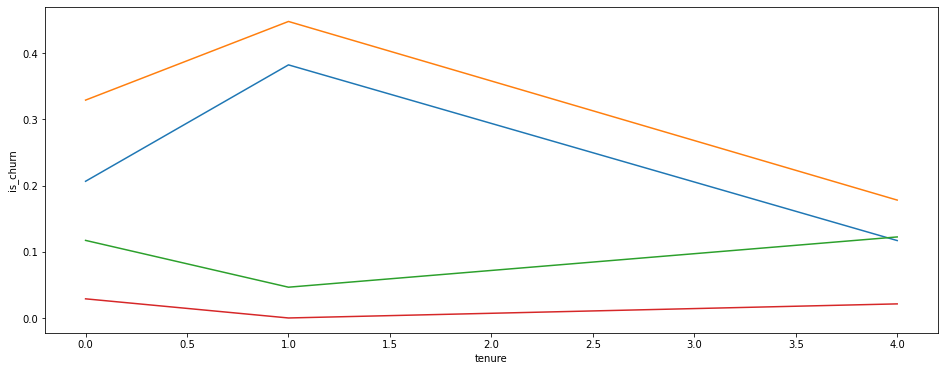

In [10]:
x = train.tenure // 6
y = train.groupby(train.tenure // 6).is_churn.mean()
y1 = train[train.contract_type == 'Month-to-month'].groupby(train.tenure // 6).is_churn.mean()
y2 = train[train.contract_type == 'One year'].groupby(train.tenure // 6).is_churn.mean()
y3 = train[train.contract_type == 'Two year'].groupby(train.tenure // 6).is_churn.mean()

plt.figure(figsize=(16,6))
plt.legend
sns.lineplot(x, y, data=train, ci=None)
sns.lineplot(x, y1, data=train, ci=None)
sns.lineplot(x, y2, data=train, ci=None)
sns.lineplot(x, y3, data=train, ci=None)

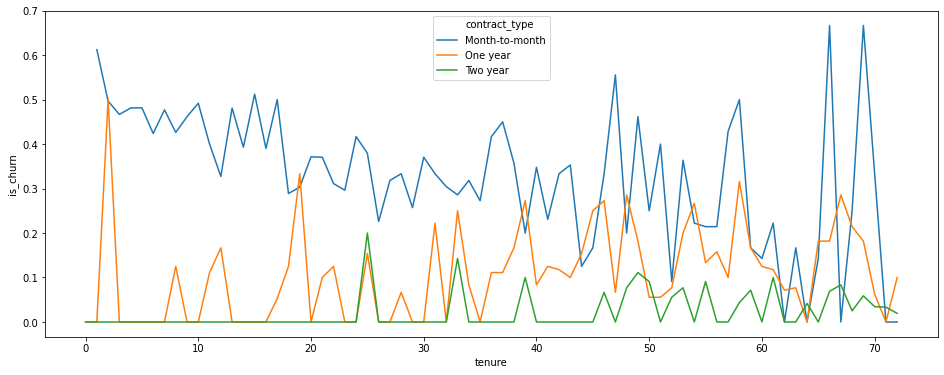

In [15]:
plt.figure(figsize=(16,6))
sns.lineplot('tenure', 'is_churn', hue='contract_type', data=train, ci=None)

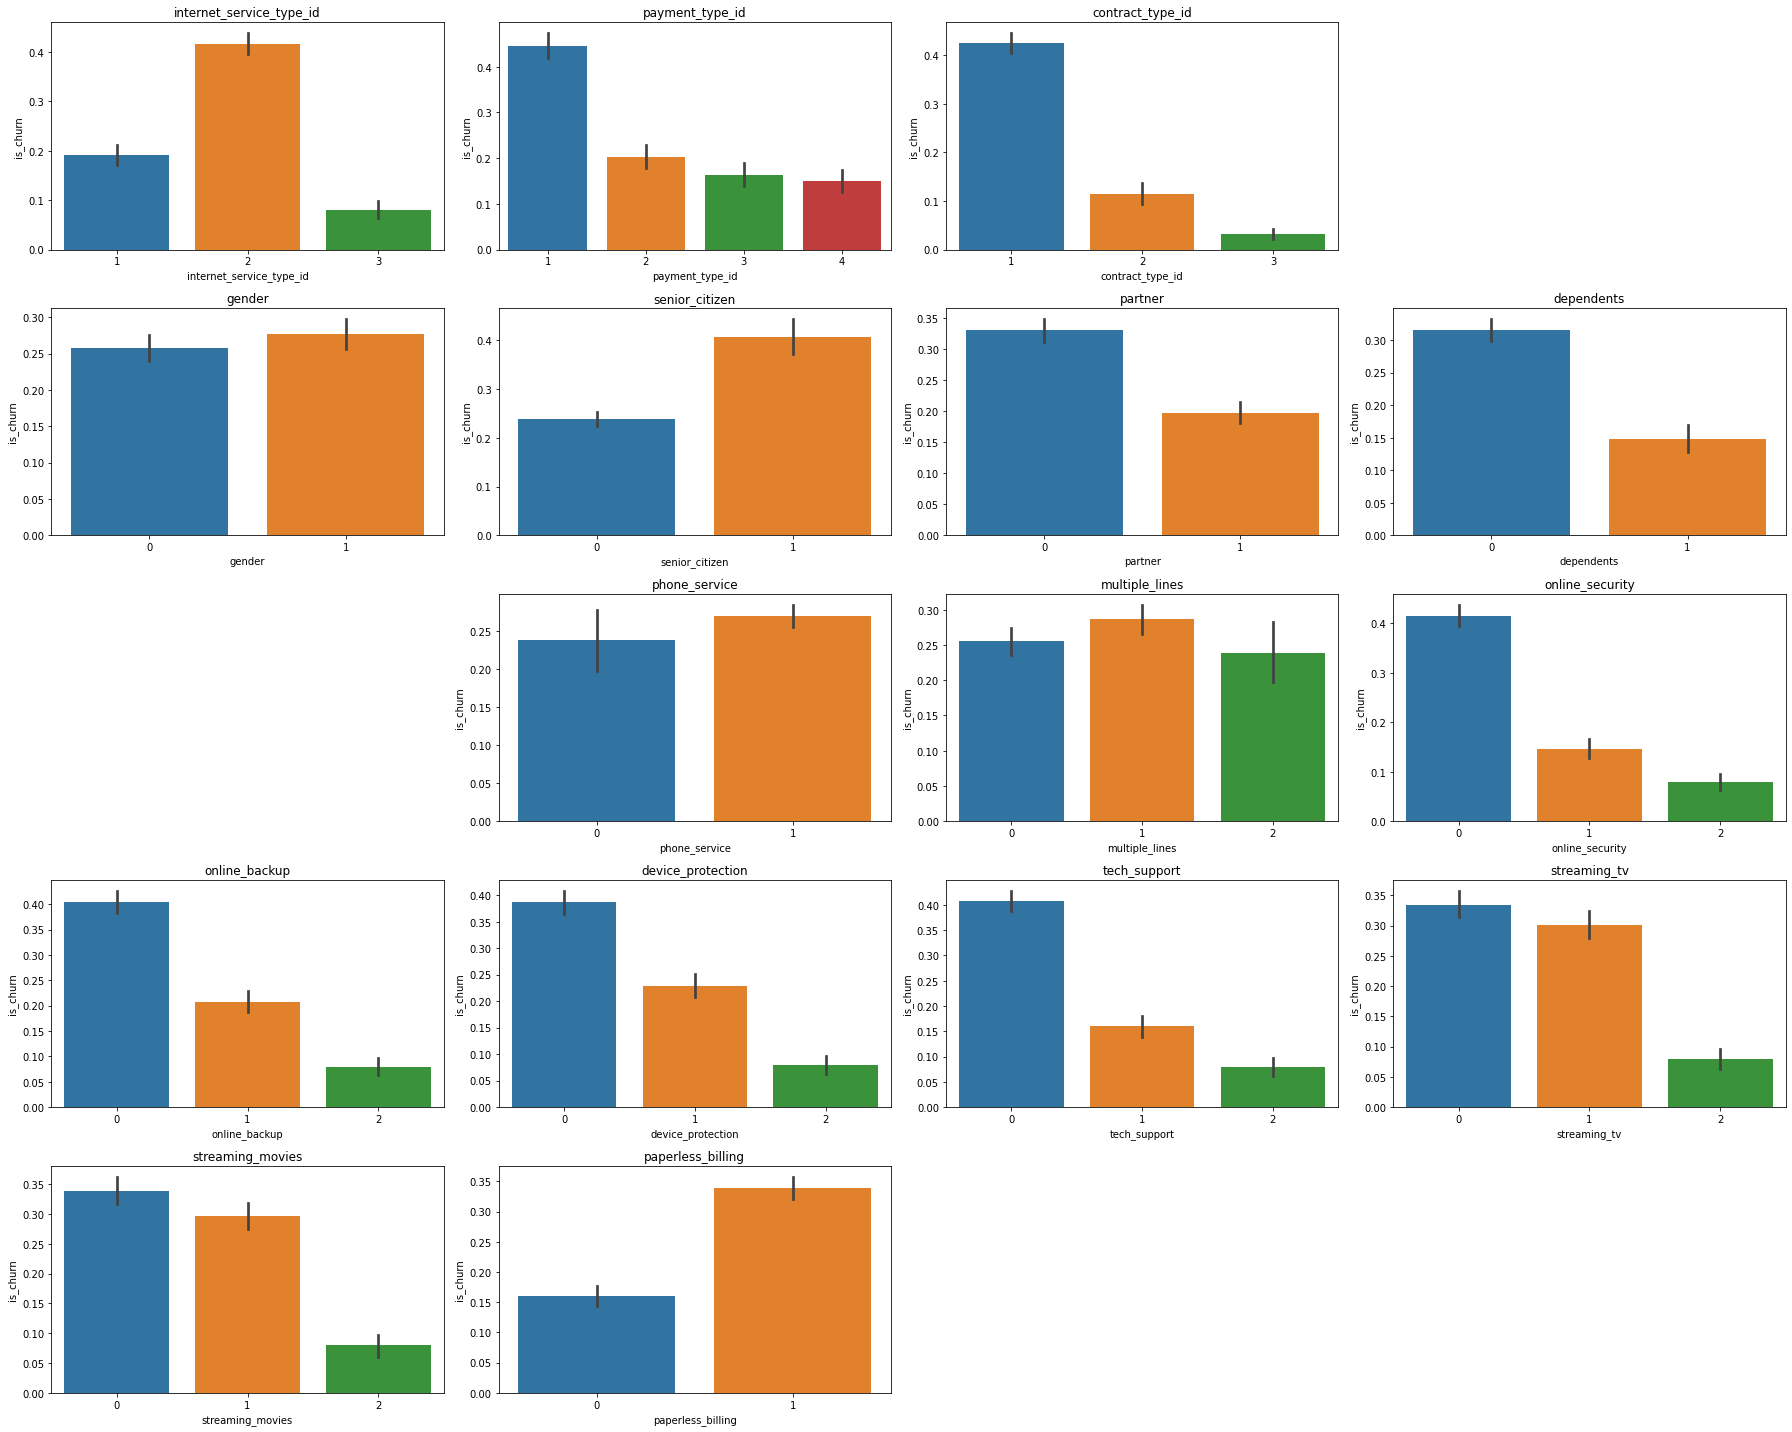

In [12]:
f = plt.figure(figsize=(25,20))
for i in range(0,20):
    if len(train.groupby(train.iloc[:,i])) < 5:
        f.add_subplot(5,4, i+1)
        sns.barplot(data=train, y="is_churn", x=train.iloc[:,i])
        plt.title(train.columns[i])
plt.tight_layout()
plt.show()

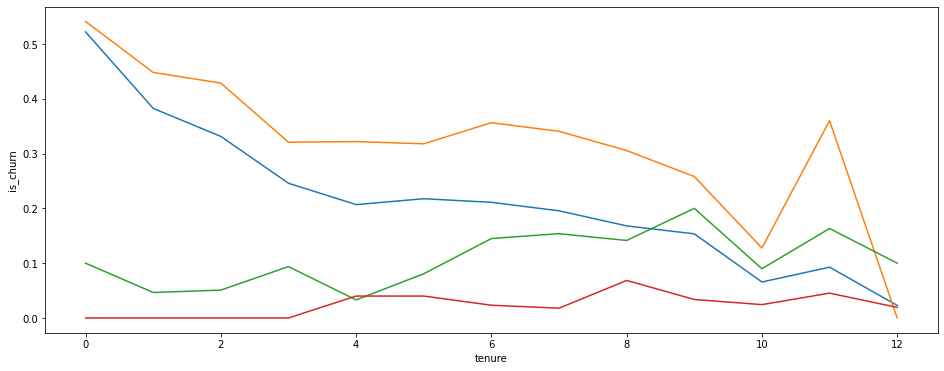

In [13]:
x = train.groupby(train.tenure // 6).tenure.sum().index
y = train.groupby(train.tenure // 6).is_churn.mean()
y1 = train[train.contract_type == 'Month-to-month'].groupby(train.tenure // 6).is_churn.mean()
y2 = train[train.contract_type == 'One year'].groupby(train.tenure // 6).is_churn.mean()
y3 = train[train.contract_type == 'Two year'].groupby(train.tenure // 6).is_churn.mean()

plt.figure(figsize=(16,6))
plt.legend
sns.lineplot(x, y, data=train, ci=None)
sns.lineplot(x, y1, data=train, ci=None)
sns.lineplot(x, y2, data=train, ci=None)
sns.lineplot(x, y3, data=train, ci=None)

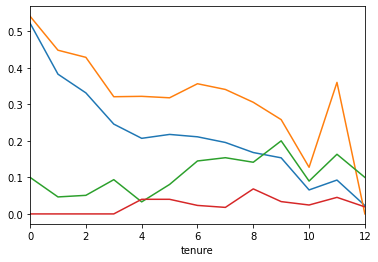

In [14]:
train.groupby(train.tenure // 6).is_churn.mean().plot()
train[train.contract_type == 'Month-to-month'].groupby(train.tenure // 6).is_churn.mean().plot()
train[train.contract_type == 'One year'].groupby(train.tenure // 6).is_churn.mean().plot()
train[train.contract_type == 'Two year'].groupby(train.tenure // 6).is_churn.mean().plot()


In [ ]:
train.groupby(train.tenure // 6).tenure.sum().index

In [ ]:
train['tenure_grouped'] = train.tenure // 6

In [ ]:
train.groupby('tenure_grouped').tenure.sum().index

In [ ]:
train.tenure_grouped

## Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?

In [ ]:
train.is_churn.value_counts()

In [62]:
# x = train.groupby((train.monthly_charges // 10)*10).is_churn.mean().index
# y = train.groupby((train.monthly_charges//10)*10).is_churn.mean().plot()

# sns.lineplot(x, y)
train.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_years,is_churn
440,1,4,1,3701-SFMUH,0,0,1,1,7,1,...,1,0,69.70,516.15,0,Month-to-month,Credit card (automatic),DSL,0,0
67,1,1,1,0674-EYYZV,1,0,0,0,1,1,...,0,1,54.65,54.65,0,Month-to-month,Electronic check,DSL,0,0
600,1,4,1,4918-QLLIW,0,0,0,0,3,1,...,0,0,53.40,188.70,1,Month-to-month,Credit card (automatic),DSL,0,1
4883,2,4,2,6097-EQISJ,1,0,1,1,66,1,...,1,1,102.45,6615.15,1,One year,Credit card (automatic),Fiber optic,5,1
1258,1,3,2,0654-PQKDW,1,0,1,1,62,1,...,0,1,70.75,4263.45,0,One year,Bank transfer (automatic),DSL,5,0


In [63]:
train.internet_service_type.value_counts(), train.internet_service_type_id.value_counts()

(Fiber optic    1866
 DSL            1454
 None            905
 Name: internet_service_type, dtype: int64, 2    1866
 1    1454
 3     905
 Name: internet_service_type_id, dtype: int64)

In [106]:
# # male_mask = train.gender == 0
# # female_mask = train.gender == 1
churn = pd.DataFrame(train.groupby((train.monthly_charges // 5)*5).is_churn.mean())
# # churn_output['is_male'] = train[male_mask].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# # churn_output["is_female"] = train[female_mask].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# churn["paperless"] = train[train.paperless_billing == 1].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# churn["mailed_bill"] = train[train.paperless_billing == 0].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# churn["fiber_optic"] = train[train.internet_service_type_id == 2].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# churn["dsl"] = train[train.internet_service_type_id == 1].groupby((train.monthly_charges // 5)*5).is_churn.mean()
# churn["no_internet"] = train[train.internet_service_type_id == 3].groupby((train.monthly_charges // 5)*5).is_churn.mean()

churn.head()

,is_churn
monthly_charges,
15.0,0.095890
20.0,0.101099
25.0,0.121212
30.0,0.339623
35.0,0.237288


In [137]:
def subset_churn_data(column_list):
    df = pd.DataFrame(train.groupby((train.monthly_charges // 5)*5).is_churn.mean())
    for c in column_list:
        subset_list = train[c].value_counts().index
        for i in subset_list:
            df[i] = train[train[c] == i].groupby((train.monthly_charges // 5)*5).is_churn.mean()
    return df
    

In [139]:
column_list = ['internet_service_type', 'payment_type', 'contract_type']
churn = subset_churn_data(column_list)

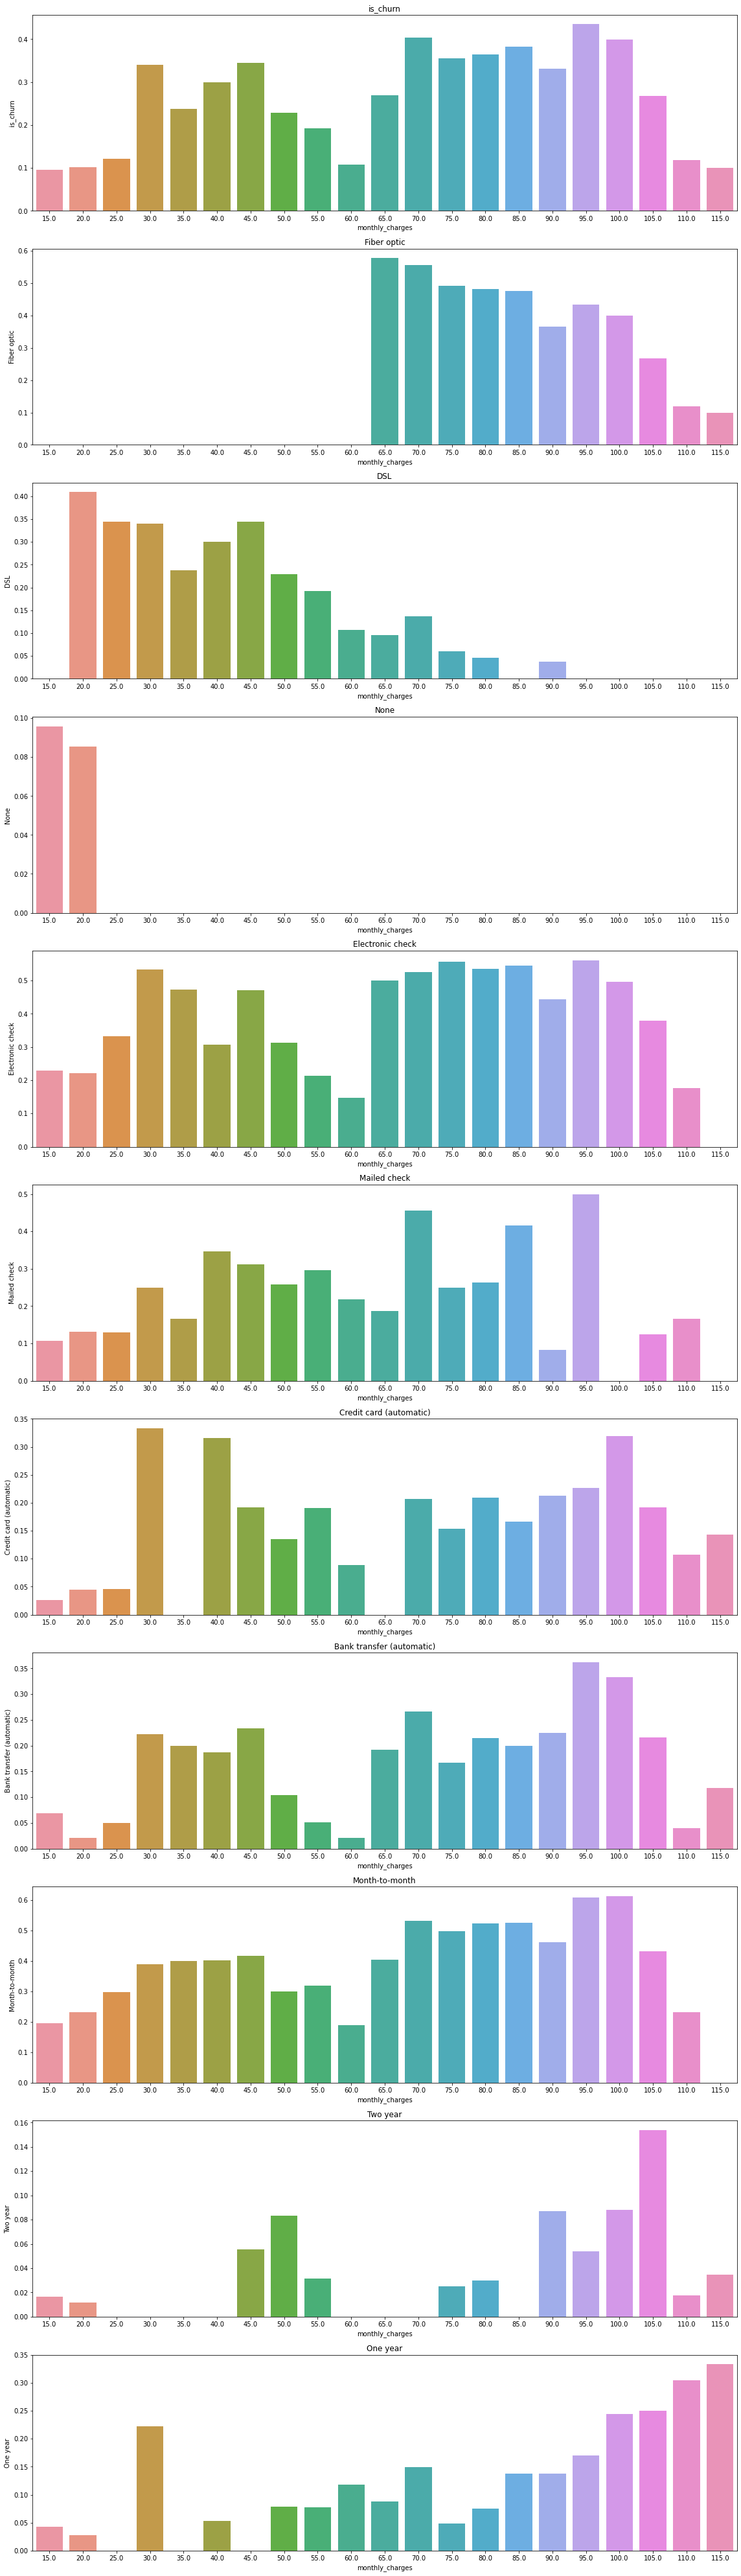

In [140]:
def make_churn_bar_plots(df):
    f = plt.figure(figsize=(16,100))
    x = churn.shape[1]
    for i in range(0, x):
        f.add_subplot(20, 1, i+1)
        sns.barplot(data=churn, y=churn.iloc[:,i], x=churn.index)
        plt.title(churn.columns[i])
    plt.tight_layout()
    plt.show() 


In [121]:
churn.shape

(11, 11)

In [120]:
column_list = ['internet_service_type', 'payment_type', 'contract_type']
churn = subset_churn_data(column_list)

In [75]:
subset_churn_data('internet_service_type').index[0]

'Fiber optic'

AttributeError: 'DataFrame' object has no attribute 'fiber_optic'

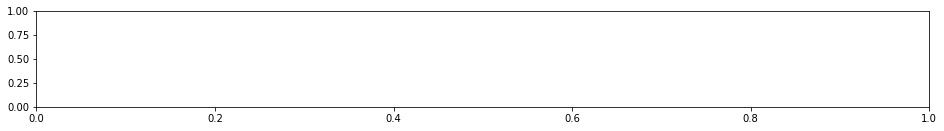

In [92]:
plt.figure(figsize=(16,6))

plt.subplot(3,1,1)
sns.barplot(x, churn.fiber_optic)
plt.subplot(3,1,2)
sns.barplot(x, churn.dsl)
plt.subplot(3,1,3)
sns.barplot(x, churn.no_internet)

In [ ]:
# f = plt.figure(figsize=(25,20))

# for i in range(0,21):
#     if len(train.groupby(train.iloc[:,i+3])) < 5:
#         f.add_subplot(5,5, i+1)
#         sns.lineplot(data=train, y="is_churn", x=train.iloc[:,i+3])
#         plt.title(train.columns[i+3])
# plt.tight_layout()
# plt.show()

In [19]:
# Does the monthly charges of people with online_security, tech_support, device_protection and online_backup different than the rest?
group = ["online_security", "online_backup", "tech_support", "device_protection"]
pd.pivot_table(train, values="monthly_charges", index=group, columns="churn", aggfunc="mean").reset_index()

churn,online_security,online_backup,tech_support,device_protection,0,1
0,0,0,0,0,64.264348,70.307551
1,0,0,0,1,77.810473,82.483740
2,0,0,1,0,70.027670,73.658511
3,0,0,1,1,74.791748,90.939744
4,0,1,0,0,72.071067,77.894175
5,0,1,0,1,84.838028,94.065663
6,0,1,1,0,77.339109,79.621667
7,0,1,1,1,89.859091,92.889474
8,1,0,0,0,65.048485,71.742857
9,1,0,0,1,71.322436,85.995238


In [ ]:
# Does the monthly charges of people with online_security, tech_support, device_protection and online_backup different than the rest?
group = ["online_security", "online_backup", "tech_support", "device_protection"]
pd.pivot_table(train, values="monthly_charges", index=group, columns="churn", aggfunc="count").reset_index()